<a href="https://colab.research.google.com/github/solobala/DLL30/blob/main/DLL_%D0%AD%D1%82%D0%B0%D0%BB%D0%BE%D0%BD_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B3%D0%BE_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_%22%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8%22_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import numpy as np

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
data_train = datasets.FashionMNIST('./data', download = True, train = True, transform = transform)
data_test = datasets.FashionMNIST('./data', download = True, train = False, transform = transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 11955391.37it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 195699.31it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3789698.33it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21788372.34it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
traindata = DataLoader(data_train, batch_size = 100, shuffle = True)
testdata = DataLoader(data_test, batch_size = 100, shuffle = True)

In [ ]:
dataiter = iter(traindata)
data = next(dataiter)
features, labels = data

In [ ]:
print('Размер изображения', features[0].shape)

Размер изображения torch.Size([1, 28, 28])


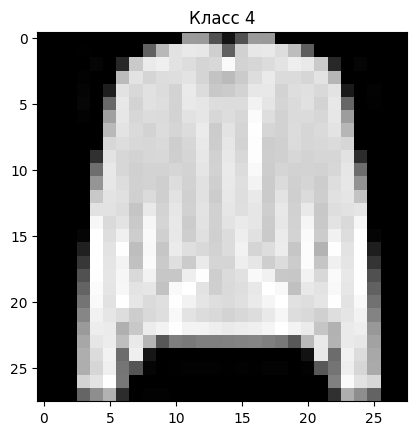

In [ ]:
plt.imshow(torch.squeeze(features[0]), cmap = 'gray')
plt.title('Класс '+ str(labels[0].item()))
plt.show()

In [ ]:
print('Количество классов', len(torch.unique(labels)))

Количество классов 10


In [ ]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 64, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64, 128, kernel_size = 3, padding = 1, padding_mode = 'replicate'),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.ReLU(),
    torch.nn.Flatten(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(1152, 10)
    )
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 50
for epoch in range(1, num_epochs + 1):
    losses_per_epoch = []
    for X, y in traindata:
        trainer.zero_grad()
        l = loss(model(X), y)
        losses_per_epoch.append(l.item())
        l.backward()
        trainer.step()
    if epoch % 5 == 0:
        print('epoch %d, loss: %f' % (epoch, np.mean(losses_per_epoch)))

epoch 5, loss: 0.252366
epoch 10, loss: 0.185551
epoch 15, loss: 0.142130
epoch 20, loss: 0.110001
epoch 25, loss: 0.084232
epoch 30, loss: 0.066676
epoch 35, loss: 0.056259
epoch 40, loss: 0.047865
epoch 45, loss: 0.045162
epoch 50, loss: 0.039348


In [ ]:
y_pred = []
y_true = []
for X, y in testdata:
    y_pred_iter = model(X)
    y_pred.extend(y_pred_iter.detach())
    y_true.extend(y.detach())

y_pred = torch.Tensor([torch.argmax(x) for x in y_pred])
y_true = torch.Tensor(y_true)

In [ ]:
from sklearn.metrics import accuracy_score
print('Точность на тестовой выборке:', accuracy_score(y_true, y_pred))

Точность на тестовой выборке: 0.9113
